In [213]:
#%% Program 05d: The Lindstedt-Poincare Method
# Deriving the order epsilon equations.
# See Example 9.

#from sympy import collect, expand, Function, Symbol
import sympy as sp
import scipy as sc
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pprint


## Define the problem

In [105]:

x0 = sp.Function('x0')
x1 = sp.Function('x1')
x2 = sp.Function('x2')
x = sp.Function('x')
tau = sp.Symbol('tau')
eps = sp.Symbol('eps')
w1 = sp.Symbol('w1')
w2 = sp.Symbol('w2')

x = x0(tau) + eps * x1(tau) + eps ** 2 * x2(tau)
exp1 = (1 + eps * w1 + eps ** 2 * w2) ** 2 * x.diff(tau, tau) + x - eps * x **3
exp1= sp.expand(exp1)
exp1


-eps**7*x2(tau)**3 + eps**6*w2**2*Derivative(x2(tau), (tau, 2)) - 3*eps**6*x1(tau)*x2(tau)**2 + 2*eps**5*w1*w2*Derivative(x2(tau), (tau, 2)) + eps**5*w2**2*Derivative(x1(tau), (tau, 2)) - 3*eps**5*x0(tau)*x2(tau)**2 - 3*eps**5*x1(tau)**2*x2(tau) + eps**4*w1**2*Derivative(x2(tau), (tau, 2)) + 2*eps**4*w1*w2*Derivative(x1(tau), (tau, 2)) + eps**4*w2**2*Derivative(x0(tau), (tau, 2)) + 2*eps**4*w2*Derivative(x2(tau), (tau, 2)) - 6*eps**4*x0(tau)*x1(tau)*x2(tau) - eps**4*x1(tau)**3 + eps**3*w1**2*Derivative(x1(tau), (tau, 2)) + 2*eps**3*w1*w2*Derivative(x0(tau), (tau, 2)) + 2*eps**3*w1*Derivative(x2(tau), (tau, 2)) + 2*eps**3*w2*Derivative(x1(tau), (tau, 2)) - 3*eps**3*x0(tau)**2*x2(tau) - 3*eps**3*x0(tau)*x1(tau)**2 + eps**2*w1**2*Derivative(x0(tau), (tau, 2)) + 2*eps**2*w1*Derivative(x1(tau), (tau, 2)) + 2*eps**2*w2*Derivative(x0(tau), (tau, 2)) - 3*eps**2*x0(tau)**2*x1(tau) + eps**2*x2(tau) + eps**2*Derivative(x2(tau), (tau, 2)) + 2*eps*w1*Derivative(x0(tau), (tau, 2)) - eps*x0(tau)**3 +

We need to be careful with this expansion, we only used to second order in $\epsilon$ for the expansion in $x$ and $\tau$. 

## Zeroth order LIndstedt Poincare.

Collect the coefficients for $\epsilon^0=O(1)$.

In [106]:

#%% Zeroth order
eq0 = exp1.coeff(eps,0)
sp.pprint(eq0)


          2       
         d        
x₀(τ) + ───(x₀(τ))
          2       
        dτ        


and solve the equation with the initial conditions, 

In [107]:

sol0=sp.solvers.ode.dsolve(eq0,ics={x0(0): 1, x0(tau).diff(tau).subs(tau, 0): 0})
sp.pprint(sol0)



x₀(τ) = cos(τ)


We need to assure that the $O(\epsilon)$ is not secular, so we need to look at the $O(\epsilon)$ problem.

In [108]:

# %% First order
eq1 = exp1.coeff(eps,1)
eq1


2*w1*Derivative(x0(tau), (tau, 2)) - x0(tau)**3 + x1(tau) + Derivative(x1(tau), (tau, 2))

In [109]:

prob1=eq1.subs(x0(tau),sol0.rhs)
prob1=prob1.simplify().rewrite(sp.exp).expand()
prob1


-w1*exp(I*tau) - w1*exp(-I*tau) + x1(tau) - exp(3*I*tau)/8 - 3*exp(I*tau)/8 + Derivative(x1(tau), (tau, 2)) - 3*exp(-I*tau)/8 - exp(-3*I*tau)/8

In [110]:

#%%
secular= prob1.simplify().rewrite(sp.exp).expand().coeff(sp.exp(sp.I*tau))
secular

-w1 - 3/8

In [111]:

#sp.pprint(secular)
sw1=sp.solve(secular,w1)

sw1

[-3/8]

In [112]:
tau_exp=t*(1+eps*sw1[0])
tau_exp

t*(1 - 3*eps/8)

The zeroth order expansion assuring that the next term is not secular:

In [143]:
asymp_exp_0=sol0.subs('tau',tau_exp).rhs 
asymp_exp_0

cos(t*(-21*eps**2/256 - 3*eps/8 + 1))

This is the $O(1)$ expansion, we are sure that the first neglected term is not secular. 

## First order
Solving for the $O(\epsilon)$ problem.

In [120]:
prob1=prob1.subs('w1',sw1[0])
prob1

x1(tau) - exp(3*I*tau)/8 + Derivative(x1(tau), (tau, 2)) - exp(-3*I*tau)/8

In [117]:

#%%
sol1=sp.solvers.ode.dsolve(prob1,ics={x1(0):0,x1(tau).diff(tau).subs(tau, 0): 0})
sol1
# %%

Eq(x1(tau), -exp(3*I*tau)/64 + cos(tau)/32 - exp(-3*I*tau)/64)

In [121]:
sol1=sol1.rewrite(sp.cos)
sol1

Eq(x1(tau), cos(tau)/32 - cos(3*tau)/32)

We need to assure that the $O(\epsilon^2)$ is not secular. 

In [129]:
eq2 = exp1.coeff(eps,2)
prob2=eq2.subs(x0(tau),sol0.rhs).subs(x1(tau),sol1.rhs).subs('w1',sw1[0])
prob2=prob2.simplify().rewrite(sp.exp).expand()
prob2

-w2*exp(I*tau) - w2*exp(-I*tau) + x2(tau) + 3*exp(5*I*tau)/256 - 3*exp(3*I*tau)/32 - 21*exp(I*tau)/256 + Derivative(x2(tau), (tau, 2)) - 21*exp(-I*tau)/256 - 3*exp(-3*I*tau)/32 + 3*exp(-5*I*tau)/256

In [130]:
secular2= prob2.simplify().rewrite(sp.exp).expand().coeff(sp.exp(sp.I*tau))
secular2

-w2 - 21/256

In [132]:
sw2=sp.solve(secular2,w2)

sw2

[-21/256]

In [139]:
soltot1=sol0.rhs+eps*sol1.rhs
soltot1

eps*(cos(tau)/32 - cos(3*tau)/32) + cos(tau)

In [140]:
tau_exp=t*(1+eps*sw1[0]+eps**2*sw2[0])
tau_exp

t*(-21*eps**2/256 - 3*eps/8 + 1)

In [156]:
asymp_exp_1=soltot1.subs('tau',tau_exp)
asymp_exp_1

eps*(cos(t*(-21*eps**2/256 - 3*eps/8 + 1))/32 - cos(3*t*(-21*eps**2/256 - 3*eps/8 + 1))/32) + cos(t*(-21*eps**2/256 - 3*eps/8 + 1))

cos(t*(-21*eps**2/256 - 3*eps/8 + 1))

## Second order??

## Prepare for print




In [222]:
eps_use=0.05
t_max=50
time=np.linspace(0,t_max,num=100)

solexp0=sp.lambdify(t,asymp_exp_0.subs('eps',eps_use))

solexp1=sp.lambdify(t,asymp_exp_1.subs('eps',eps_use))

### Numerical solution

In [223]:
def rhs(t,u,eps):
    x,y= u
    x_dot = y
    y_dot = -x +eps* x**3
    return [x_dot, y_dot]
eps=0.01
sol = solve_ivp(rhs,[0,np.max(time)],[0,1],t_eval=time,args=([eps_use]))

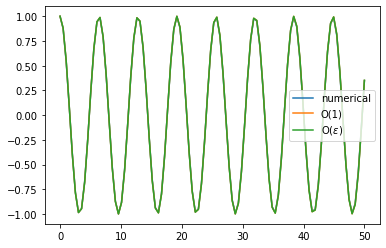

In [224]:
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,solexp0(sol.t))
plt.plot(sol.t,solexp1(sol.t))
plt.legend(['numerical','O(1)','O($\epsilon$)'])


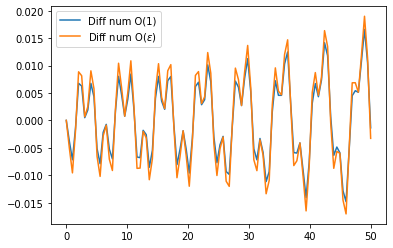

In [225]:
plt.plot(sol.t,sol.y[1]-solexp0(sol.t))
plt.plot(sol.t,sol.y[1]-solexp1(sol.t))

plt.legend(['Diff num O(1)','Diff num O($\epsilon$)'])

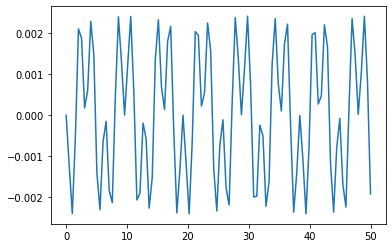

In [226]:
plt.plot(sol.t,solexp0(sol.t)-solexp1(sol.t))